# Principal component analysis (PCA) on spectroscopy data

This notebook illustrates how to use the **hoggorm** package to carry out principal component analysis (PCA) on spectroscopy data. Furthermore, we will learn how to visualise the results of the PCA using the **hoggormPlot** package.

---

### Import packages and prepare data

First import **hoggorm** for analysis of the data and **hoggormPlot** for plotting of the analysis results. We'll also import **pandas** such that we can read the data into a data frame. **numpy** is needed for checking dimensions of the data.

In [1]:
import hoggorm as ho
import hoggormplot as hop
import pandas as pd
import numpy as np

Next, load the spectroscopy data that we are going to analyse using **hoggorm**. After the data has been loaded into the pandas data frame, we'll display it in the notebook.

In [6]:
# Load data

# Insert code for reading data from other folder in repository instead of directly from same repository.
data_df = pd.read_csv('gasoline_NIR.txt', header=None, sep='\s+')

Let's have a look at the dimensions of the data frame.

In [7]:
np.shape(data_df)

(60, 401)

The ``nipalsPCA`` class in hoggorm accepts only **numpy** arrays with numerical values and not pandas data frames. Therefore, the pandas data frame holding the imported data needs to be "taken apart" into three parts: 
* a numpy array holding the numeric values
* a Python list holding variable (column) names
* a Python list holding object (row) names. 

The array with values will be used as input for the ``nipalsPCA`` class for analysis. The Python lists holding the variable and row names will be used later in the plotting function from the **hoggormPlot** package when visualising the results of the analysis. Below is the code needed to access both data, variable names and object names.

In [10]:
# Get the values from the data frame
data = data_df.values

---

### Apply PCA to our data

Now, let's run PCA on the data using the ``nipalsPCA`` class. The documentation provides a [description of the input parameters](https://hoggorm.readthedocs.io/en/latest/pca.html). Using input paramter ``arrX`` we define which numpy array we would like to analyse. By setting input parameter ``Xstand=False`` we make sure that the variables are only mean centered, not scaled to unit variance. This is the default setting and actually doesn't need to expressed explicitly. Setting paramter ``cvType=["loo"]`` we make sure that we compute the PCA model using full cross validation. ``"loo"`` means "Leave One Out". By setting paramter ``numpComp=4`` we ask for four principal components (PC) to be computed.

In [12]:
model = ho.nipalsPCA(arrX=data, Xstand=False, cvType=["loo"], numComp=5)

loo
loo


That's it, the PCA model has been computed. Now we would like to inspect the results by visualising them. We can do this using the taylor-made plotting function for PCA from the separate [**hoggormPlot** package](https://hoggormplot.readthedocs.io/en/latest/). If we wish to plot the results for component 1 and component 2, we can do this by setting the input argument ``comp=[1, 2]``. The input argument ``plots=[1, 6]`` lets the user define which plots are to be plotted. If this list for example contains value ``1``, the function will generate the scores plot for the model. If the list contains value ``6``, the function will generate a explained variance plot. The hoggormPlot documentation provides a [description of input paramters](https://hoggormplot.readthedocs.io/en/latest/mainPlot.html).

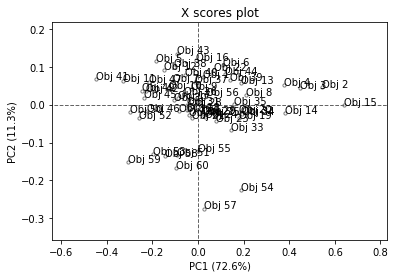

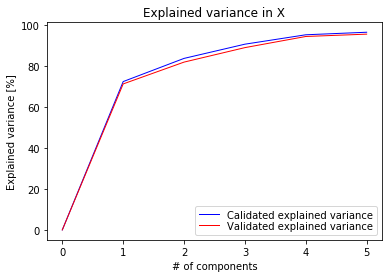

In [15]:
hop.plot(model, comp=[1, 2], 
         plots=[1, 6])

It is also possible to generate the same plots one by one with specific plot functions as shown below.

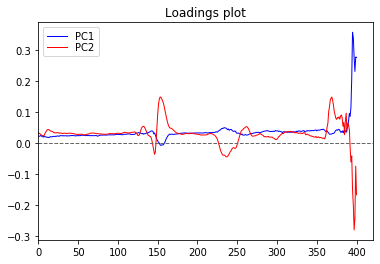

In [19]:
hop.loadings(model, line=True)

---

### Accessing numerical results

Now that we have visualised the PCA results, we may also want to access the numerical results. Below are some examples. For a complete list of accessible results, please see this part of the documentation.  

In [21]:
# Get scores and store in numpy array
scores = model.X_scores()

# Get scores and store in pandas dataframe with row and column names
scores_df = pd.DataFrame(model.X_scores())
#scores_df.index = data_objNames
scores_df.columns = ['PC{0}'.format(x+1) for x in range(model.X_scores().shape[1])]
scores_df

,PC1,PC2,PC3,PC4,PC5
0,0.020082,0.073100,0.096431,-0.037799,0.046846
1,0.542646,0.046265,0.045296,-0.002835,0.000012
2,0.449275,0.044604,-0.054206,0.084612,-0.001227
3,0.376704,0.051102,0.104006,-0.053364,-0.010051
4,-0.182992,0.115471,0.057602,0.065753,-0.038813
5,0.109397,0.104524,0.100058,-0.013542,-0.010737
6,-0.111562,0.060955,0.022934,0.076916,-0.027543
7,0.212391,0.025322,-0.043598,0.068100,-0.015676
8,-0.031795,0.041594,0.010894,0.081882,-0.027163
9,-0.128297,0.043146,0.034463,0.067407,-0.034408


In [22]:
help(ho.nipalsPCA.X_scores)

Help on function X_scores in module hoggorm.pca:

X_scores(self)
    Returns array holding scores T. First column holds scores for
    component 1, second column holds scores for component 2, etc.



In [23]:
# Dimension of the scores
np.shape(model.X_scores())

(60, 5)

We see that the numpy array holds the scores for four components as required when computing the PCA model.

In [27]:
# Get loadings and store in numpy array
loadings = model.X_loadings()

# Get loadings and store in pandas dataframe with row and column names
loadings_df = pd.DataFrame(model.X_loadings()) 
#loadings_df.index = data_varNames
loadings_df.columns = ['PC{0}'.format(x+1) for x in range(model.X_loadings().shape[1])]
loadings_df

,PC1,PC2,PC3,PC4,PC5
0,0.010761,0.022410,0.033510,0.039027,0.041516
1,0.010313,0.021588,0.030888,0.040657,0.038927
2,0.011046,0.022215,0.029598,0.041633,0.035870
3,0.012475,0.024319,0.027347,0.045222,0.031199
4,0.013082,0.021474,0.025045,0.045259,0.035395
5,0.014159,0.022623,0.023366,0.045839,0.035860
6,0.013685,0.018651,0.022783,0.049866,0.043444
7,0.014221,0.022608,0.023914,0.044390,0.039649
8,0.013137,0.019569,0.029728,0.040631,0.033897
9,0.012153,0.020054,0.034402,0.030317,0.039549


In [28]:
help(ho.nipalsPCA.X_loadings)

Help on function X_loadings in module hoggorm.pca:

X_loadings(self)
    Returns array holding loadings P of array X. Rows represent variables
    and columns represent components. First column holds loadings for
    component 1, second column holds scores for component 2, etc.



In [29]:
np.shape(model.X_loadings())

(401, 5)

In [30]:
# Get loadings and store in numpy array
loadings = model.X_corrLoadings()

# Get loadings and store in pandas dataframe with row and column names
loadings_df = pd.DataFrame(model.X_corrLoadings()) 
#loadings_df.index = data_varNames
loadings_df.columns = ['PC{0}'.format(x+1) for x in range(model.X_corrLoadings().shape[1])]
loadings_df

,PC1,PC2,PC3,PC4,PC5
0,0.502996,0.414017,0.484784,0.459178,0.253604
1,0.496101,0.410447,0.459857,0.492293,0.244697
2,0.523029,0.415747,0.433729,0.496223,0.221940
3,0.565736,0.435909,0.383789,0.516251,0.184878
4,0.597914,0.387894,0.354216,0.520687,0.211384
5,0.623573,0.393795,0.318431,0.508199,0.206368
6,0.604709,0.325726,0.311509,0.554671,0.250854
7,0.620098,0.389628,0.322674,0.487237,0.225915
8,0.606568,0.357106,0.424805,0.472232,0.204521
9,0.579231,0.377743,0.507474,0.363661,0.246333


In [31]:
help(ho.nipalsPCA.X_corrLoadings)

Help on function X_corrLoadings in module hoggorm.pca:

X_corrLoadings(self)
    Returns array holding correlation loadings of array X. First column
    holds correlation loadings for component 1, second column holds
    correlation loadings for component 2, etc.



In [32]:
# Get calibrated explained variance of each component
calExplVar = model.X_calExplVar()

# Get calibrated explained variance and store in pandas dataframe with row and column names
calExplVar_df = pd.DataFrame(model.X_calExplVar())
calExplVar_df.columns = ['calibrated explained variance']
calExplVar_df.index = ['PC{0}'.format(x+1) for x in range(model.X_loadings().shape[1])]
calExplVar_df

,calibrated explained variance
PC1,72.565138
PC2,11.338019
PC3,6.954257
PC4,4.599826
PC5,1.240297


In [33]:
help(ho.nipalsPCA.X_calExplVar)

Help on function X_calExplVar in module hoggorm.pca:

X_calExplVar(self)
    Returns a list holding the calibrated explained variance for
    each component. First number in list is for component 1, second number
    for component 2, etc.



In [34]:
# Get cumulative calibrated explained variance
cumCalExplVar = model.X_cumCalExplVar()

# Get cumulative calibrated explained variance and store in pandas dataframe with row and column names
cumCalExplVar_df = pd.DataFrame(model.X_cumCalExplVar())
cumCalExplVar_df.columns = ['cumulative calibrated explained variance']
cumCalExplVar_df.index = ['PC{0}'.format(x) for x in range(model.X_loadings().shape[1] + 1)]
cumCalExplVar_df

,cumulative calibrated explained variance
PC0,0.000000
PC1,72.565138
PC2,83.903157
PC3,90.857413
PC4,95.457240
PC5,96.697537


In [35]:
help(ho.nipalsPCA.X_cumCalExplVar)

Help on function X_cumCalExplVar in module hoggorm.pca:

X_cumCalExplVar(self)
    Returns a list holding the cumulative validated explained variance
    for array X after each component. First number represents zero
    components, second number represents component 1, etc.



In [37]:
# Get cumulative calibrated explained variance for each variable
cumCalExplVar_ind = model.X_cumCalExplVar_indVar()

# Get cumulative calibrated explained variance for each variable and store in pandas dataframe with row and column names
cumCalExplVar_ind_df = pd.DataFrame(model.X_cumCalExplVar_indVar()) 
#cumCalExplVar_ind_df.columns = data_varNames
cumCalExplVar_ind_df.index = ['PC{0}'.format(x) for x in range(model.X_loadings().shape[1] + 1)]
cumCalExplVar_ind_df

,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,400
PC0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
PC1,25.300542,24.611602,27.355922,32.005666,35.750065,38.884360,36.567342,38.452109,36.792509,33.550817,...,82.317118,79.047055,67.306082,24.672910,2.013696,0.073010,5.619993,3.389344,0.002642,0.589727
PC2,42.441993,41.458724,44.640897,51.007847,50.796701,54.392295,47.177506,53.633605,49.545416,47.820232,...,89.716152,86.563084,82.153037,70.027533,72.031710,54.766212,45.111443,43.302068,70.883884,66.646222
PC3,65.948096,62.609792,63.457029,65.741002,63.346670,64.534962,56.883549,64.048268,67.594733,73.577576,...,90.673333,86.743400,84.743118,71.128313,79.745782,66.502726,70.177623,69.972282,74.060959,81.467589
PC4,87.040973,86.853587,88.088902,92.399968,90.465091,90.367660,87.656014,87.794167,89.902585,86.809442,...,90.736111,87.485897,86.914025,72.783629,81.494393,70.972463,78.470780,82.418617,81.889604,89.398996
PC5,93.476085,92.844979,93.018051,95.820907,94.936826,94.629706,93.953098,92.901335,94.088453,92.880195,...,91.954581,91.030901,89.637574,72.913872,87.233677,88.918380,94.707556,84.791428,82.079672,92.058344


In [38]:
help(ho.nipalsPCA.X_cumCalExplVar_indVar)

Help on function X_cumCalExplVar_indVar in module hoggorm.pca:

X_cumCalExplVar_indVar(self)
    Returns an array holding the cumulative calibrated explained variance
    for each variable in X after each component. First row represents zero
    components, second row represents one component, third row represents
    two components, etc. Columns represent variables.



In [39]:
# Get calibrated predicted X for a given number of components

# Predicted X from calibration using 1 component
X_from_1_component = model.X_predCal()[1]

# Predicted X from calibration using 1 component stored in pandas data frame with row and columns names
X_from_1_component_df = pd.DataFrame(model.X_predCal()[1])
#X_from_1_component_df.index = data_objNames
#X_from_1_component_df.columns = data_varNames
X_from_1_component_df

,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,400
0,-0.052611,-0.047228,-0.043363,-0.038934,-0.034474,-0.032126,-0.030556,-0.033291,-0.036478,-0.039515,...,1.204451,1.215202,1.236595,1.252604,1.262773,1.264311,1.231643,1.225628,1.219023,1.201453
1,-0.046988,-0.041839,-0.037591,-0.032415,-0.027637,-0.024727,-0.023405,-0.025859,-0.029614,-0.033164,...,1.138479,1.157731,1.185653,1.220453,1.250238,1.266876,1.210109,1.211712,1.218673,1.196055
2,-0.047993,-0.042802,-0.038623,-0.033580,-0.028859,-0.026049,-0.024683,-0.027187,-0.030840,-0.034299,...,1.150267,1.168000,1.194755,1.226198,1.252478,1.266418,1.213957,1.214199,1.218736,1.197020
3,-0.048773,-0.043551,-0.039424,-0.034485,-0.029808,-0.027076,-0.025676,-0.028219,-0.031793,-0.035181,...,1.159429,1.175981,1.201830,1.230663,1.254219,1.266062,1.216947,1.216131,1.218784,1.197769
4,-0.054796,-0.049323,-0.045606,-0.041467,-0.037130,-0.035001,-0.033336,-0.036178,-0.039146,-0.041983,...,1.230089,1.237536,1.256392,1.265098,1.267644,1.263315,1.240011,1.231036,1.219159,1.203551
5,-0.051650,-0.046307,-0.042377,-0.037819,-0.033305,-0.030861,-0.029334,-0.032020,-0.035305,-0.038430,...,1.193176,1.205379,1.227888,1.247109,1.260631,1.264750,1.227962,1.223250,1.218963,1.200531
6,-0.054027,-0.048586,-0.044817,-0.040576,-0.036196,-0.033990,-0.032358,-0.035163,-0.038208,-0.041115,...,1.221071,1.229680,1.249428,1.260703,1.265931,1.263665,1.237067,1.229134,1.219111,1.202813
7,-0.050542,-0.045245,-0.041239,-0.036535,-0.031958,-0.029403,-0.027925,-0.030556,-0.033952,-0.037178,...,1.180173,1.194052,1.217848,1.240772,1.258160,1.265255,1.223718,1.220507,1.218894,1.199467
8,-0.053169,-0.047763,-0.043936,-0.039581,-0.035152,-0.032860,-0.031266,-0.034028,-0.037160,-0.040146,...,1.211001,1.220908,1.241652,1.255795,1.264017,1.264057,1.233780,1.227010,1.219058,1.201989
9,-0.054208,-0.048759,-0.045002,-0.040785,-0.036415,-0.034227,-0.032587,-0.035401,-0.038427,-0.041319,...,1.223184,1.231521,1.251060,1.261733,1.266332,1.263583,1.237757,1.229579,1.219122,1.202986


In [40]:
# Get predicted X for a given number of components

# Predicted X from calibration using 4 components
X_from_4_component = model.X_predCal()[4]

# Predicted X from calibration using 1 component stored in pandas data frame with row and columns names
X_from_4_component_df = pd.DataFrame(model.X_predCal()[4])
#X_from_4_component_df.index = data_objNames
#X_from_4_component_df.columns = data_varNames
X_from_4_component_df

,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,400
0,-0.049217,-0.044208,-0.040459,-0.036228,-0.032200,-0.029951,-0.028881,-0.031010,-0.033717,-0.035878,...,1.216216,1.221437,1.241732,1.266374,1.277662,1.275531,1.232244,1.226915,1.237562,1.211225
1,-0.044544,-0.039557,-0.035341,-0.030179,-0.025638,-0.022752,-0.021652,-0.023856,-0.027477,-0.030764,...,1.144941,1.161052,1.188410,1.228494,1.260175,1.273923,1.210722,1.212050,1.228533,1.201700
2,-0.045507,-0.040074,-0.035713,-0.030151,-0.025429,-0.022428,-0.020867,-0.023719,-0.028141,-0.032704,...,1.150982,1.169166,1.197388,1.232531,1.269147,1.279560,1.224703,1.220443,1.222934,1.205696
3,-0.046226,-0.041404,-0.037432,-0.032811,-0.028521,-0.025936,-0.025014,-0.026945,-0.029870,-0.032196,...,1.169635,1.180859,1.205033,1.240457,1.261469,1.270659,1.212434,1.213659,1.232900,1.202531
4,-0.047712,-0.042377,-0.038599,-0.034110,-0.030232,-0.028029,-0.026591,-0.029272,-0.032502,-0.035692,...,1.242768,1.243682,1.261636,1.282885,1.294388,1.280938,1.242653,1.230501,1.237377,1.215958
5,-0.046483,-0.041511,-0.037657,-0.033154,-0.029168,-0.026779,-0.025780,-0.027866,-0.030835,-0.033302,...,1.207772,1.213222,1.234754,1.265822,1.284060,1.282216,1.231405,1.226009,1.242443,1.214737
6,-0.048891,-0.043434,-0.039582,-0.034988,-0.030831,-0.028549,-0.026863,-0.029822,-0.033208,-0.036772,...,1.226850,1.231265,1.249724,1.267735,1.277433,1.268032,1.232173,1.222100,1.223172,1.204262
7,-0.048777,-0.043276,-0.039132,-0.034031,-0.029424,-0.026727,-0.025050,-0.028003,-0.031986,-0.036105,...,1.179737,1.194083,1.218740,1.243636,1.267786,1.272233,1.229436,1.223080,1.219333,1.203519
8,-0.048676,-0.043200,-0.039281,-0.034568,-0.030280,-0.027911,-0.026159,-0.029193,-0.032695,-0.036454,...,1.214328,1.220826,1.240104,1.258933,1.269977,1.263508,1.225934,1.217400,1.217926,1.199350
9,-0.049455,-0.044022,-0.040217,-0.035745,-0.031574,-0.029355,-0.027636,-0.030609,-0.033820,-0.037224,...,1.227896,1.231785,1.249241,1.265124,1.270558,1.261033,1.226591,1.217574,1.218749,1.199011


In [41]:
help(ho.nipalsPCA.X_predCal)

Help on function X_predCal in module hoggorm.pca:

X_predCal(self)
    Returns a dictionary holding the predicted arrays Xhat from
    calibration after each computed component. Dictionary key represents
    order of component.



In [42]:
# Get validated explained variance of each component
valExplVar = model.X_valExplVar()

# Get calibrated explained variance and store in pandas dataframe with row and column names
valExplVar_df = pd.DataFrame(model.X_valExplVar())
valExplVar_df.columns = ['validated explained variance']
valExplVar_df.index = ['PC{0}'.format(x+1) for x in range(model.X_loadings().shape[1])]
valExplVar_df

,validated explained variance
PC1,71.415215
PC2,10.672744
PC3,7.088484
PC4,5.448433
PC5,1.145096


In [43]:
help(ho.nipalsPCA.X_valExplVar)

Help on function X_valExplVar in module hoggorm.pca:

X_valExplVar(self)
    Returns a list holding the validated explained variance for X after
    each component. First number in list is for component 1, second number
    for component 2, third number for component 3, etc.



In [44]:
# Get cumulative validated explained variance
cumValExplVar = model.X_cumValExplVar()

# Get cumulative validated explained variance and store in pandas dataframe with row and column names
cumValExplVar_df = pd.DataFrame(model.X_cumValExplVar())
cumValExplVar_df.columns = ['cumulative validated explained variance']
cumValExplVar_df.index = ['PC{0}'.format(x) for x in range(model.X_loadings().shape[1] + 1)]
cumValExplVar_df

,cumulative validated explained variance
PC0,0.000000
PC1,71.415215
PC2,82.087959
PC3,89.176443
PC4,94.624876
PC5,95.769973


In [45]:
help(ho.nipalsPCA.X_cumValExplVar)

Help on function X_cumValExplVar in module hoggorm.pca:

X_cumValExplVar(self)
    Returns a list holding the cumulative validated explained variance
    for array X after each component.



In [46]:
# Get cumulative validated explained variance for each variable
cumCalExplVar_ind = model.X_cumCalExplVar_indVar()

# Get cumulative validated explained variance for each variable and store in pandas dataframe with row and column names
cumValExplVar_ind_df = pd.DataFrame(model.X_cumValExplVar_indVar())
#cumValExplVar_ind_df.columns = data_varNames
cumValExplVar_ind_df.index = ['PC{0}'.format(x) for x in range(model.X_loadings().shape[1] + 1)]
cumValExplVar_ind_df

,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,400
PC0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
PC1,22.710872,21.660941,24.633452,29.395892,32.929146,36.269480,33.410238,36.056511,34.476418,31.650333,...,81.508076,78.599717,66.107833,23.652124,-0.308331,-2.210922,2.928987,0.323311,-1.866828,-1.736965
PC2,37.041768,35.701940,39.251132,46.268708,45.824521,49.846358,41.555877,49.099234,44.884280,43.187382,...,88.428120,85.245979,79.717190,66.259572,69.632602,50.840185,40.400170,38.230413,67.908421,63.038326
PC3,59.549386,55.127538,55.861670,58.527133,55.416556,56.896679,47.825787,56.688266,61.150641,68.928297,...,88.968249,84.631048,82.184860,66.422820,77.869434,63.746844,65.688602,63.197396,69.828459,77.373464
PC4,84.409841,84.151860,85.759920,90.776563,88.410193,88.494435,85.189375,85.545819,87.891494,84.123411,...,88.700223,85.085762,84.491970,66.990241,78.535613,67.574335,74.788183,78.349408,78.462909,87.311900
PC5,91.611547,90.890894,91.184396,94.505493,93.312892,93.084239,92.169401,91.093997,92.373971,90.861056,...,89.548650,88.720966,86.525575,63.075198,84.344950,85.840815,93.573627,80.572202,76.758932,89.815669


In [47]:
help(ho.nipalsPCA.X_cumValExplVar_indVar)

Help on function X_cumValExplVar_indVar in module hoggorm.pca:

X_cumValExplVar_indVar(self)
    Returns an array holding the cumulative validated explained variance
    for each variable in X after each component. First row represents
    zero components, second row represents component 1, third row for
    compnent 2, etc. Columns represent variables.



In [49]:
# Get validated predicted X for a given number of components

# Predicted X from validation using 1 component
X_from_1_component_val = model.X_predVal()[1]

# Predicted X from calibration using 1 component stored in pandas data frame with row and columns names
X_from_1_component_val_df = pd.DataFrame(model.X_predVal()[1])
#X_from_1_component_val_df.index = data_objNames
#X_from_1_component_val_df.columns = data_varNames
X_from_1_component_val_df

,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,400
0,-0.052654,-0.047253,-0.043385,-0.038966,-0.034495,-0.032144,-0.030568,-0.033327,-0.036519,-0.039577,...,1.204576,1.215067,1.236509,1.252646,1.263053,1.264538,1.231093,1.225307,1.218563,1.201118
1,-0.047475,-0.042245,-0.037951,-0.032718,-0.027856,-0.024933,-0.023602,-0.026006,-0.029788,-0.033307,...,1.140074,1.159301,1.185280,1.219966,1.249506,1.264172,1.209302,1.209640,1.216976,1.195430
2,-0.048160,-0.043013,-0.038847,-0.033862,-0.029165,-0.026398,-0.025090,-0.027483,-0.031057,-0.034387,...,1.150832,1.168292,1.194591,1.225073,1.251362,1.265056,1.213313,1.213155,1.217364,1.195619
3,-0.048993,-0.043709,-0.039550,-0.034547,-0.029842,-0.027097,-0.025709,-0.028282,-0.031926,-0.035339,...,1.159720,1.176811,1.202179,1.230568,1.253510,1.265437,1.217519,1.216286,1.217592,1.197049
4,-0.054901,-0.049436,-0.045730,-0.041604,-0.037243,-0.035085,-0.033372,-0.036204,-0.039167,-0.042003,...,1.229091,1.237254,1.256051,1.264647,1.266633,1.262159,1.240285,1.230951,1.218680,1.203491
5,-0.051742,-0.046399,-0.042469,-0.037919,-0.033391,-0.030948,-0.029415,-0.032108,-0.035405,-0.038539,...,1.192850,1.205387,1.227701,1.246833,1.260031,1.264153,1.227957,1.223175,1.218755,1.200373
6,-0.054114,-0.048671,-0.044907,-0.040678,-0.036286,-0.034081,-0.032450,-0.035264,-0.038304,-0.041197,...,1.220707,1.229692,1.249463,1.260550,1.265708,1.263024,1.237448,1.229354,1.219030,1.202849
7,-0.050596,-0.045307,-0.041314,-0.036630,-0.032055,-0.029521,-0.028038,-0.030657,-0.034040,-0.037225,...,1.179995,1.194176,1.217751,1.240628,1.258077,1.264336,1.223809,1.220514,1.218559,1.199847
8,-0.053225,-0.047823,-0.044000,-0.039660,-0.035221,-0.032936,-0.031338,-0.034103,-0.037231,-0.040201,...,1.210842,1.221006,1.241755,1.255860,1.263868,1.263652,1.234152,1.227244,1.219112,1.202090
9,-0.054279,-0.048829,-0.045078,-0.040876,-0.036489,-0.034311,-0.032660,-0.035482,-0.038508,-0.041383,...,1.223016,1.231621,1.251305,1.261676,1.266167,1.262965,1.238314,1.229963,1.219180,1.203228


In [50]:
# Get validated predicted X for a given number of components

# Predicted X from validation using 3 components
X_from_3_component_val = model.X_predVal()[3]

# Predicted X from calibration using 3 components stored in pandas data frame with row and columns names
X_from_3_component_val_df = pd.DataFrame(model.X_predVal()[3])
#X_from_3_component_val_df.index = data_objNames
#X_from_3_component_val_df.columns = data_varNames
X_from_3_component_val_df

,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,400
0,-0.047637,-0.042494,-0.038693,-0.034349,-0.030292,-0.028006,-0.026761,-0.029198,-0.032074,-0.034737,...,1.216597,1.219273,1.238665,1.264580,1.276182,1.271058,1.221824,1.217379,1.230466,1.204159
1,-0.044526,-0.039469,-0.035202,-0.029961,-0.025365,-0.022465,-0.021381,-0.023503,-0.027150,-0.030395,...,1.147647,1.163132,1.188177,1.229174,1.261016,1.271847,1.209454,1.209287,1.228007,1.201681
2,-0.049028,-0.043788,-0.039523,-0.034326,-0.029643,-0.026734,-0.025609,-0.027837,-0.031863,-0.035384,...,1.153025,1.173436,1.203704,1.237631,1.277363,1.293061,1.242832,1.238199,1.235285,1.218615
3,-0.043804,-0.038810,-0.034727,-0.029781,-0.025472,-0.022833,-0.021727,-0.023996,-0.027241,-0.030184,...,1.169744,1.179724,1.201307,1.237315,1.255866,1.260941,1.200861,1.201215,1.223371,1.192680
4,-0.050624,-0.045423,-0.041740,-0.037530,-0.033607,-0.031369,-0.030102,-0.032361,-0.035336,-0.037803,...,1.242196,1.246887,1.266674,1.287483,1.299825,1.290147,1.258939,1.245708,1.247596,1.227744
5,-0.045705,-0.040741,-0.036878,-0.032344,-0.028343,-0.025950,-0.024910,-0.027057,-0.030122,-0.032745,...,1.206838,1.212801,1.233005,1.265096,1.282073,1.278787,1.228466,1.222590,1.241473,1.212971
6,-0.052084,-0.046748,-0.042978,-0.038679,-0.034507,-0.032269,-0.030897,-0.033445,-0.036538,-0.039282,...,1.227423,1.234674,1.255328,1.272558,1.284257,1.279184,1.248589,1.238505,1.234466,1.216267
7,-0.051500,-0.046123,-0.042063,-0.037237,-0.032637,-0.030007,-0.028605,-0.031160,-0.034865,-0.038216,...,1.180503,1.197158,1.223409,1.247895,1.273908,1.281658,1.243242,1.237054,1.229039,1.214441
8,-0.051986,-0.046645,-0.042812,-0.038413,-0.034112,-0.031799,-0.030371,-0.032961,-0.036153,-0.039047,...,1.215204,1.224414,1.245950,1.264164,1.277040,1.275517,1.242827,1.234425,1.229843,1.211847
9,-0.052243,-0.046917,-0.043185,-0.038977,-0.034785,-0.032616,-0.031157,-0.033768,-0.036728,-0.039411,...,1.228649,1.234915,1.254482,1.269522,1.276691,1.270888,1.241364,1.232293,1.228907,1.209911


In [51]:
help(ho.nipalsPCA.X_predVal)

Help on function X_predVal in module hoggorm.pca:

X_predVal(self)
    Returns a dictionary holding the predicted arrays Xhat from
    validation after each computed component. Dictionary key represents
    order of component.



In [52]:
# Get predicted scores for new measurements (objects) of X

# First pretend that we acquired new X data by using part of the existing data and overlaying some noise
import numpy.random as npr
new_data = data[0:4, :] + npr.rand(4, np.shape(data)[1])
np.shape(new_data)

# Now insert the new data into the existing model and compute scores for two components (numComp=2)
pred_scores = model.X_scores_predict(new_data, numComp=2)

# Same as above, but results stored in a pandas dataframe with row names and column names
pred_scores_df = pd.DataFrame(model.X_scores_predict(new_data, numComp=2))
pred_scores_df.columns = ['PC{0}'.format(x) for x in range(2)]
pred_scores_df.index = ['new object {0}'.format(x) for x in range(np.shape(new_data)[0])]
pred_scores_df

,PC0,PC1
new object 0,2.143577,7.487844
new object 1,2.930911,6.962830
new object 2,1.878479,7.650605
new object 3,2.172548,7.371672


In [53]:
help(ho.nipalsPCA.X_scores_predict)

Help on function X_scores_predict in module hoggorm.pca:

X_scores_predict(self, Xnew, numComp=None)
    Returns array of X scores from new X data using the exsisting model.
    Rows represent objects and columns represent components.

